# Visualization

## Topics
1. Matplotlib core framework
2. Pandas plot()
3. Seaborn statistical visualization
4. (not covered) Grammer of graphics (ggplot2 see plotnine )
5. (not covered) Interactive plotting

## Resources
1. Ch 9 in Python for Data Analysis, 2nd Ed, Wes McKinney (UCalgary library and https://github.com/wesm/pydata-book)
2. Ch 4 in Python Data Science Handbook, Jake VanderPlas (Ucalgary library and https://github.com/jakevdp/PythonDataScienceHandbook)
3. Fundamentals of Data Visualization, Claus O. Wilke (Ucalgary library and https://serialmentor.com/dataviz/index.html)
4. Overview by Jake VanderPlas https://www.youtube.com/watch?v=FytuB8nFHPQ


## Matplotlib
> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.  
Matplotlib tries to make easy things easy and hard things possible.  
For simple plotting the pyplot module provides a MATLAB-like interface

https://matplotlib.org

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


### Two interfaces
Matlab style and Object oriented style interfaces

See Ch 4 in Python Data Science Handbook, Jake VanderPlas

- Two Interfaces for the Price of One, pp. 222
- Matplotlib Gotchas, pp. 232

### Matlab style interface

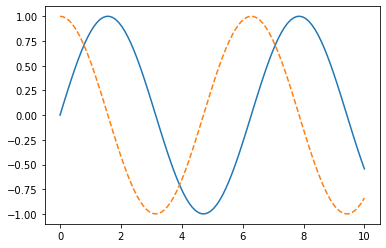

In [2]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

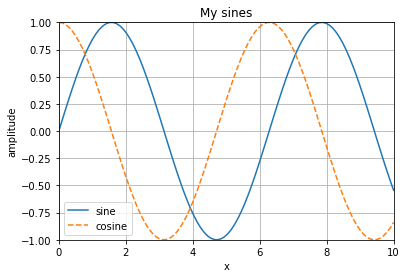

In [3]:
plt.plot(x, np.sin(x), '-', label='sine')
plt.plot(x, np.cos(x), '--', label ='cosine')

plt.xlim([0, 10])
plt.ylim([-1, 1])
plt.xlabel('x')
plt.ylabel('amplitude')
plt.title('My sines')
plt.grid()
plt.legend();

### Object oriented interface 

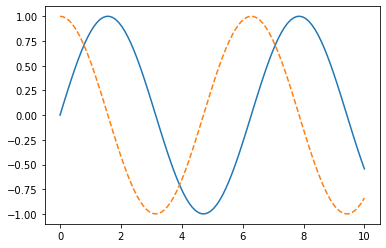

In [4]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-')
ax.plot(x, np.cos(x), '--');

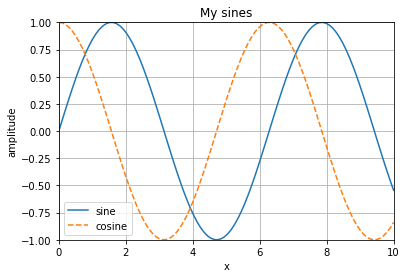

In [5]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-', label='sine')
ax.plot(x, np.cos(x), '--', label ='cosine')

ax.set(xlim=[0, 10], ylim=[-1, 1],
       xlabel='x', ylabel='amplitude',
       title='My sines');
ax.grid()
ax.legend();

### Save to file 

In [6]:
fig.savefig('sines.pdf')

In [7]:
!ls *.pdf

sines.pdf


## Plotting with pandas
> We use the standard convention for referencing the matplotlib API ...
> We provide the basics in pandas to easily create decent looking plots. 

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [2]:
# load the heart attack dataset
data = pd.read_csv('../L14-code/data.csv', na_values='?')

Plotting all columns, works, but does not provide a lot of insight.

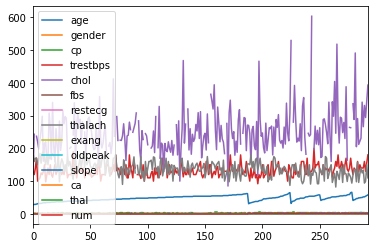

In [9]:
data.plot()

Let's look at the age distribution (a histogram)

In [14]:
5+7

12

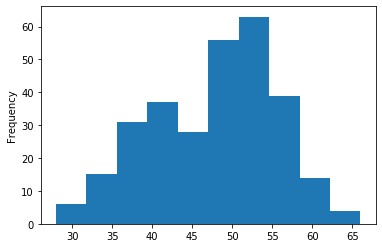

In [15]:
data['age'].plot.hist();

Do we have similar ages in females and males?

In [16]:
data.gender.value_counts()

1    212
0     81
Name: gender, dtype: int64

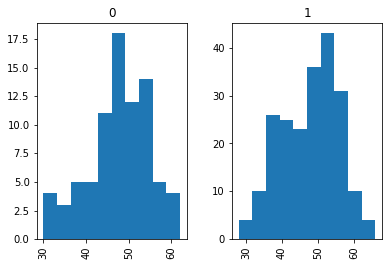

In [17]:
axs = data.hist(column='age', by='gender')

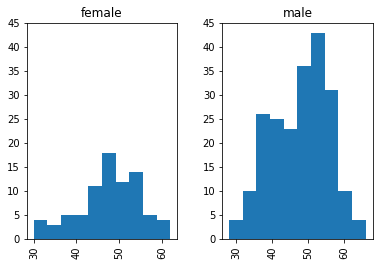

In [18]:
axs = data.hist(column='age', by='gender')
axs[0].set(title='female', ylim=[0, 45])
axs[1].set(title='male', ylim=[0, 45]);

Is age and blood pressure correlated? Maybe it is different for females and males?  
Let's have a look with a scatter plot.

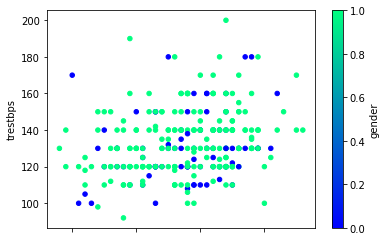

In [19]:
data.plot.scatter('age', 'trestbps', c='gender', colormap='winter');

According to:  
https://stackoverflow.com/questions/43578976/pandas-missing-x-tick-labels

this is a pandas bug.

Workaraound is to create axes prior to calling plot

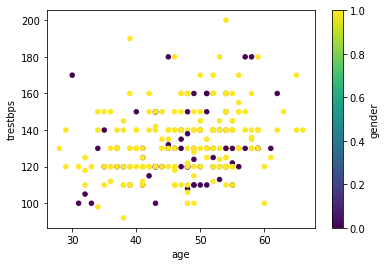

In [6]:
fig, ax = plt.subplots()
data.plot.scatter('age', 'trestbps', c='gender', colormap='viridis', ax=ax);

In order to not get the colorbar, because gender is really categorical and only two colors are needed, we need to loop over the categories and assign colors based on the category.

See:
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

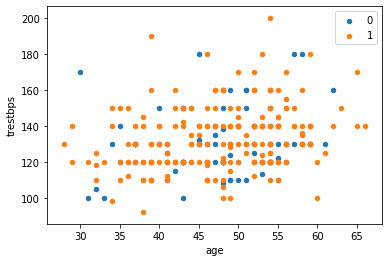

In [12]:
colors = {0: 'tab:blue', 1: 'tab:orange'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='gender'):
    group.plot.scatter('age', 'trestbps', c=colors[key], label=key, ax=ax);

## Seaborn 
>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

http://seaborn.pydata.org/index.html

In [14]:
import seaborn as sns

Let's re-create the histograms by gender with seaborn

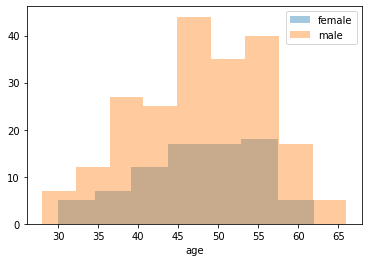

In [15]:
female = data[data['gender']==0]
male = data[data['gender']==1]
sns.distplot(female['age'], kde=False, label='female')
sns.distplot(male['age'], kde=False, label='male')
plt.legend()

It might be good to use the same bins

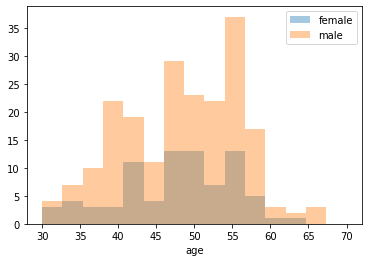

In [20]:
# define range and number of bins
bin_range = [30, 70]
n_bins = 15

female = data[data['gender']==0]
male = data[data['gender']==1]
sns.distplot(female['age'], kde=False, label='female', bins=n_bins, hist_kws={'range': bin_range})
sns.distplot(male['age'], kde=False, label='male', bins=n_bins, hist_kws={'range': bin_range})
plt.legend()

For reference, let's add the total counts

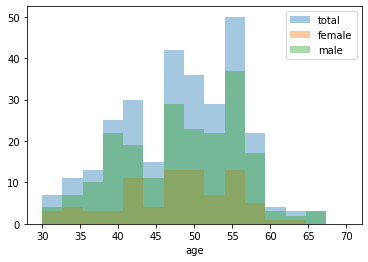

In [21]:
female = data[data['gender']==0]
male = data[data['gender']==1]
sns.distplot(data['age'], kde=False, label='total', bins=n_bins, hist_kws={'range': bin_range})
sns.distplot(female['age'], kde=False, label='female', bins=n_bins, hist_kws={'range': bin_range})
sns.distplot(male['age'], kde=False, label='male', bins=n_bins, hist_kws={'range': bin_range})
plt.legend()

Let's re-create the scatter plot to see if age and blood pressure are correlated by gender.

To make the legend show strings we will create a gender string column with female and male strings rather than 0 and 1.

In [23]:
data['gender_str'] = data['gender'].replace([0, 1], ['female', 'male'])

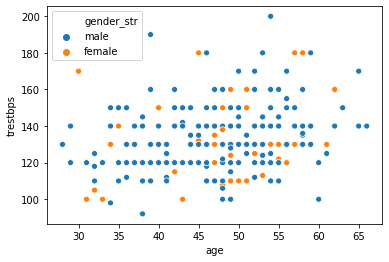

In [24]:
ax = sns.scatterplot('age', 'trestbps', data=data, hue='gender_str')

Adding a regression line helps with visualizing the relationship

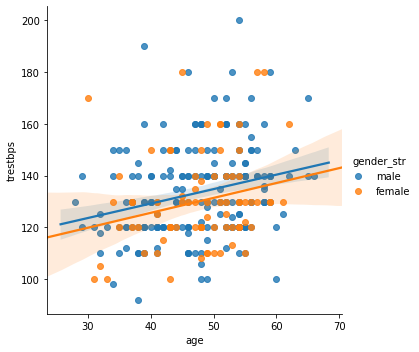

In [25]:
ax = sns.lmplot('age', 'trestbps', data=data, hue='gender_str')

Maybe there are other correlations in the data set. Pairplot is a great way to get an overview

In [ ]:
data.info()

/Users/pauc/miniconda3/envs/ensf592/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/pauc/miniconda3/envs/ensf592/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


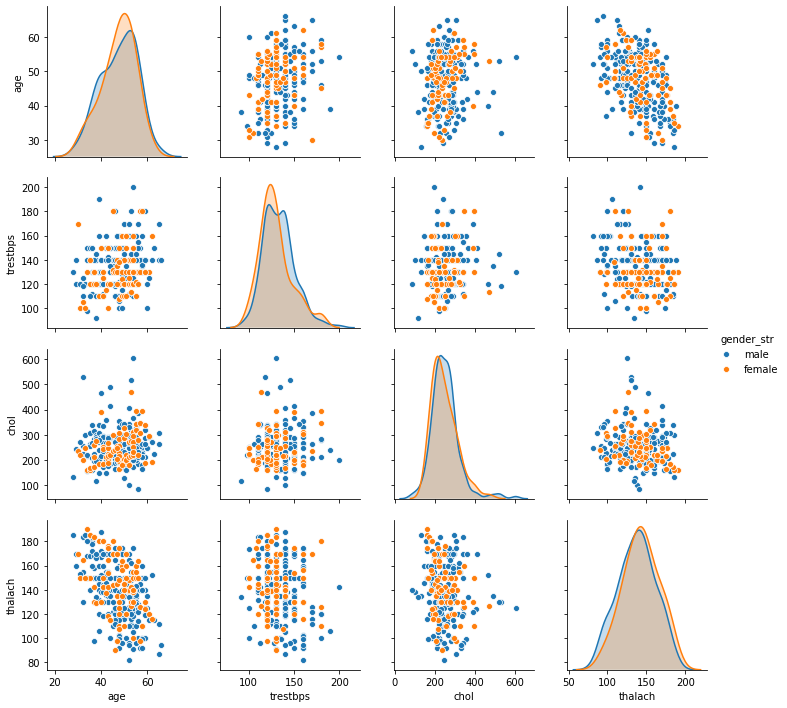

In [26]:
sns.pairplot(data, vars=['age', 'trestbps', 'chol', 'thalach'], hue='gender_str')

As an alternative, we can visualize the correlation matrix as a heatmap

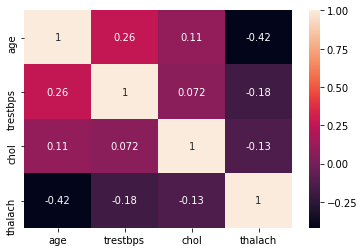

In [27]:
g = sns.heatmap(data[['age', 'trestbps', 'chol', 'thalach']].corr(method='spearman'), 
            annot=True)
# a little hack to get the top and bottom squares not to be cropped
# set y limits to be the same as x limits (in reverse order that 1's are on main diagonal)
g.set_ylim(g.get_xlim()[::-1]);